#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

#### Read file and print a sample of 10 entries.

In [2]:
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_data.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
79,55.0,0,336,0,45,1,324000.0,0.90,140,0,0,74,0
172,70.0,1,171,0,60,1,176000.0,1.10,145,1,1,146,0
128,61.0,0,248,0,30,1,267000.0,0.70,136,1,1,104,0
39,60.0,0,235,1,38,0,329000.0,3.00,142,0,0,30,1
252,50.0,0,245,0,45,1,274000.0,1.00,133,1,0,215,0
121,66.0,1,68,1,38,1,162000.0,1.00,136,0,0,95,0
224,58.0,0,582,1,25,0,504000.0,1.00,138,1,0,205,0
9,80.0,1,123,0,35,1,388000.0,9.40,133,1,1,10,1
4,65.0,1,160,1,20,0,327000.0,2.70,116,0,0,8,1
69,65.0,0,113,1,25,0,497000.0,1.83,135,1,0,67,1


#### Print the shape of the file so we know the number of columns and entries  

There are 299 entries across 13 columns.

In [3]:
heart_data.shape

(299, 13)

#### Investigate the types of data that we have.  
We can see that all of our data is of a numeric type, even categories like sex, or high blood pressure.  
This also gives us a chance to look at the column names.


In [4]:
heart_data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

#### Describe all columns  

Here we can get a look at the type of data we are dealing with.  
Some of the columns such as Sex are binary, having simply a 1 or 0 to denote the sex of the subject.

In [5]:
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


#### Binary Variables  
Our Binary Variables are as follows:  
Sex - 1 = Male, 0 = Female  
  
1 = Yes, 0 = No, for the following: Anaemia, Diabetes, High Blood Pressure, Smoking, Death Event. 

#### Check for missing values  

Our data table is complete with no missing values.

In [6]:
missing = pd.concat([heart_data.isnull().sum(), 100 * heart_data.isnull().mean()], axis=1)
missing.columns=['Count', '%']
missing.sort_values(by='Count')

,Count,%
age,0,0.0
anaemia,0,0.0
creatinine_phosphokinase,0,0.0
diabetes,0,0.0
ejection_fraction,0,0.0
high_blood_pressure,0,0.0
platelets,0,0.0
serum_creatinine,0,0.0
serum_sodium,0,0.0
sex,0,0.0


#### Investigate the distributions of feature values   
Here we can get an idea of how are values are distributed, easily seperating the binary values form those with a range, and evaluating the distribution of the binary values. For instance we have less subjects that are anemic then those who are not.


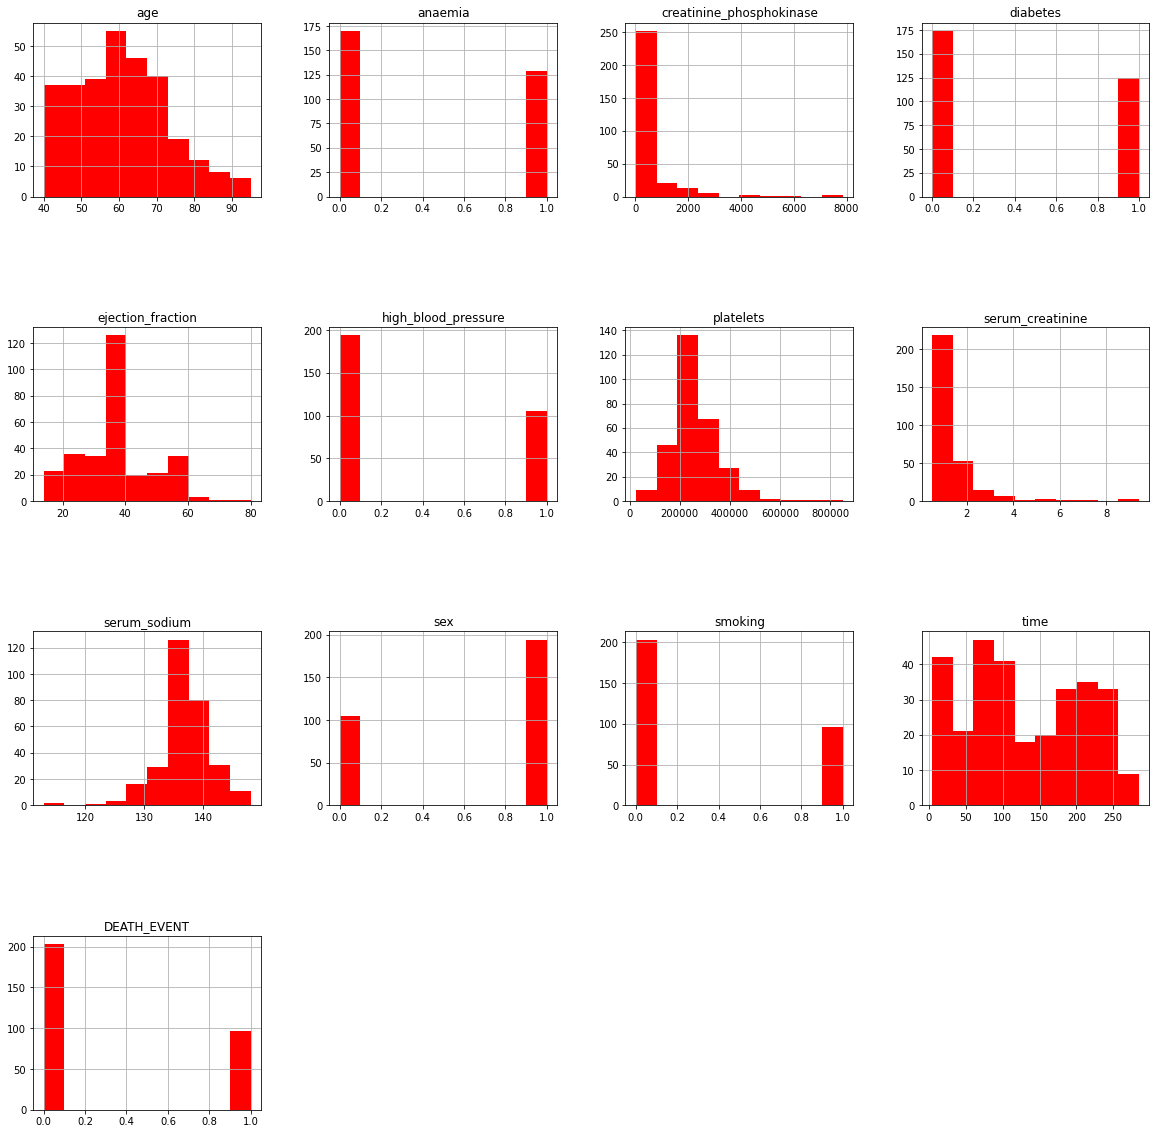

In [7]:
heart_data.hist(figsize=(20,20), color='r')
plt.subplots_adjust(hspace=.75);

#### Distribution of Death Event by Age

Of our 299 subjects 96 suffered a death event. We show the distribution of the subjects ages at death.

In [8]:
heart_data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [9]:
death_age = heart_data.loc[heart_data['DEATH_EVENT'] == 1, 'age']

Text(0.5, 1.0, 'Death Age Distribution Plot')

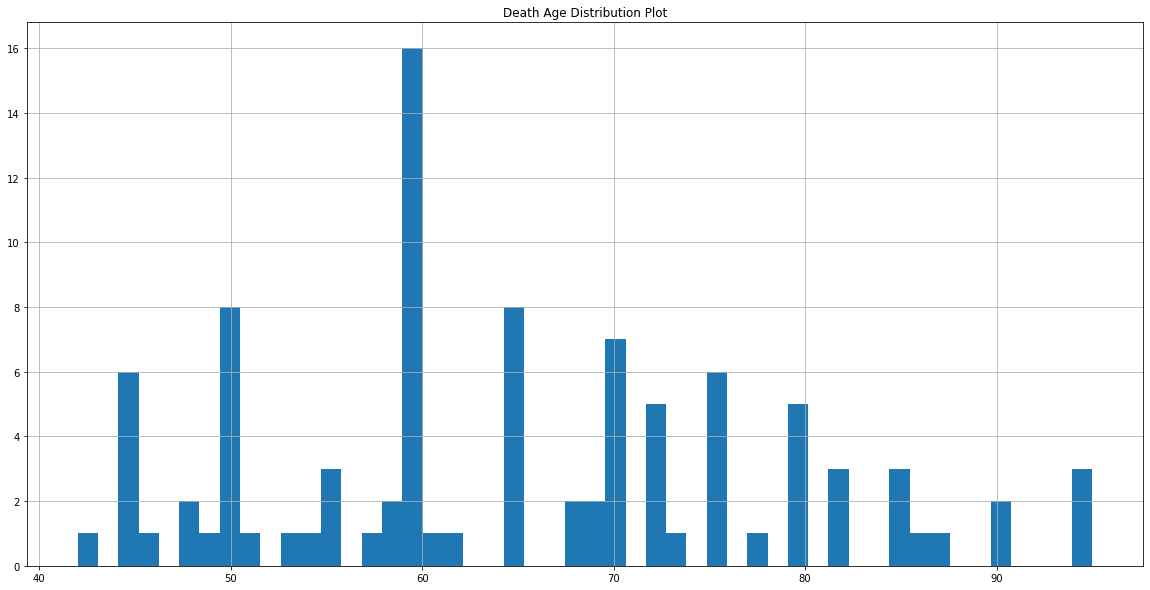

In [10]:
death_age.hist(bins=50, figsize=(20,10))
plt.title("Death Age Distribution Plot")

### Distribution of gender wise age  
0 = Female 1 = Male  
You can see that the majority of the ages fall between 40 and 80.

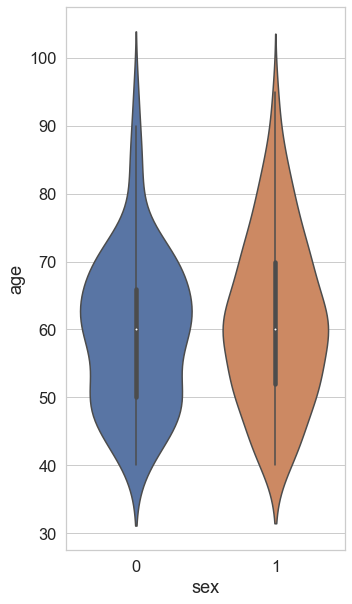

In [42]:
plt.figure(figsize=(5,10))
g = sns.violinplot(x='sex', y='age', data=heart_data)


### Looking at the variables with Pandas Profiling

In [31]:
profile = ProfileReport(heart_data, title="Pandas Profiling Report")
profile.to_widgets()


### Investigating correlation  
We're going to use the Seaborn Pairplot function to see if there are any strongly correlated variables.  
  
__As an example__

The graph below, taken from a study on college admissions shows a very strong correlation between GPA and the chance of admission.

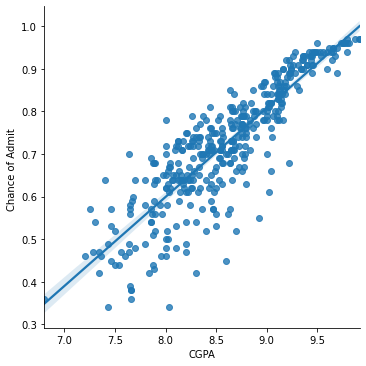

Looking at the charts below we don't see a strong correlation between any of the variables.  

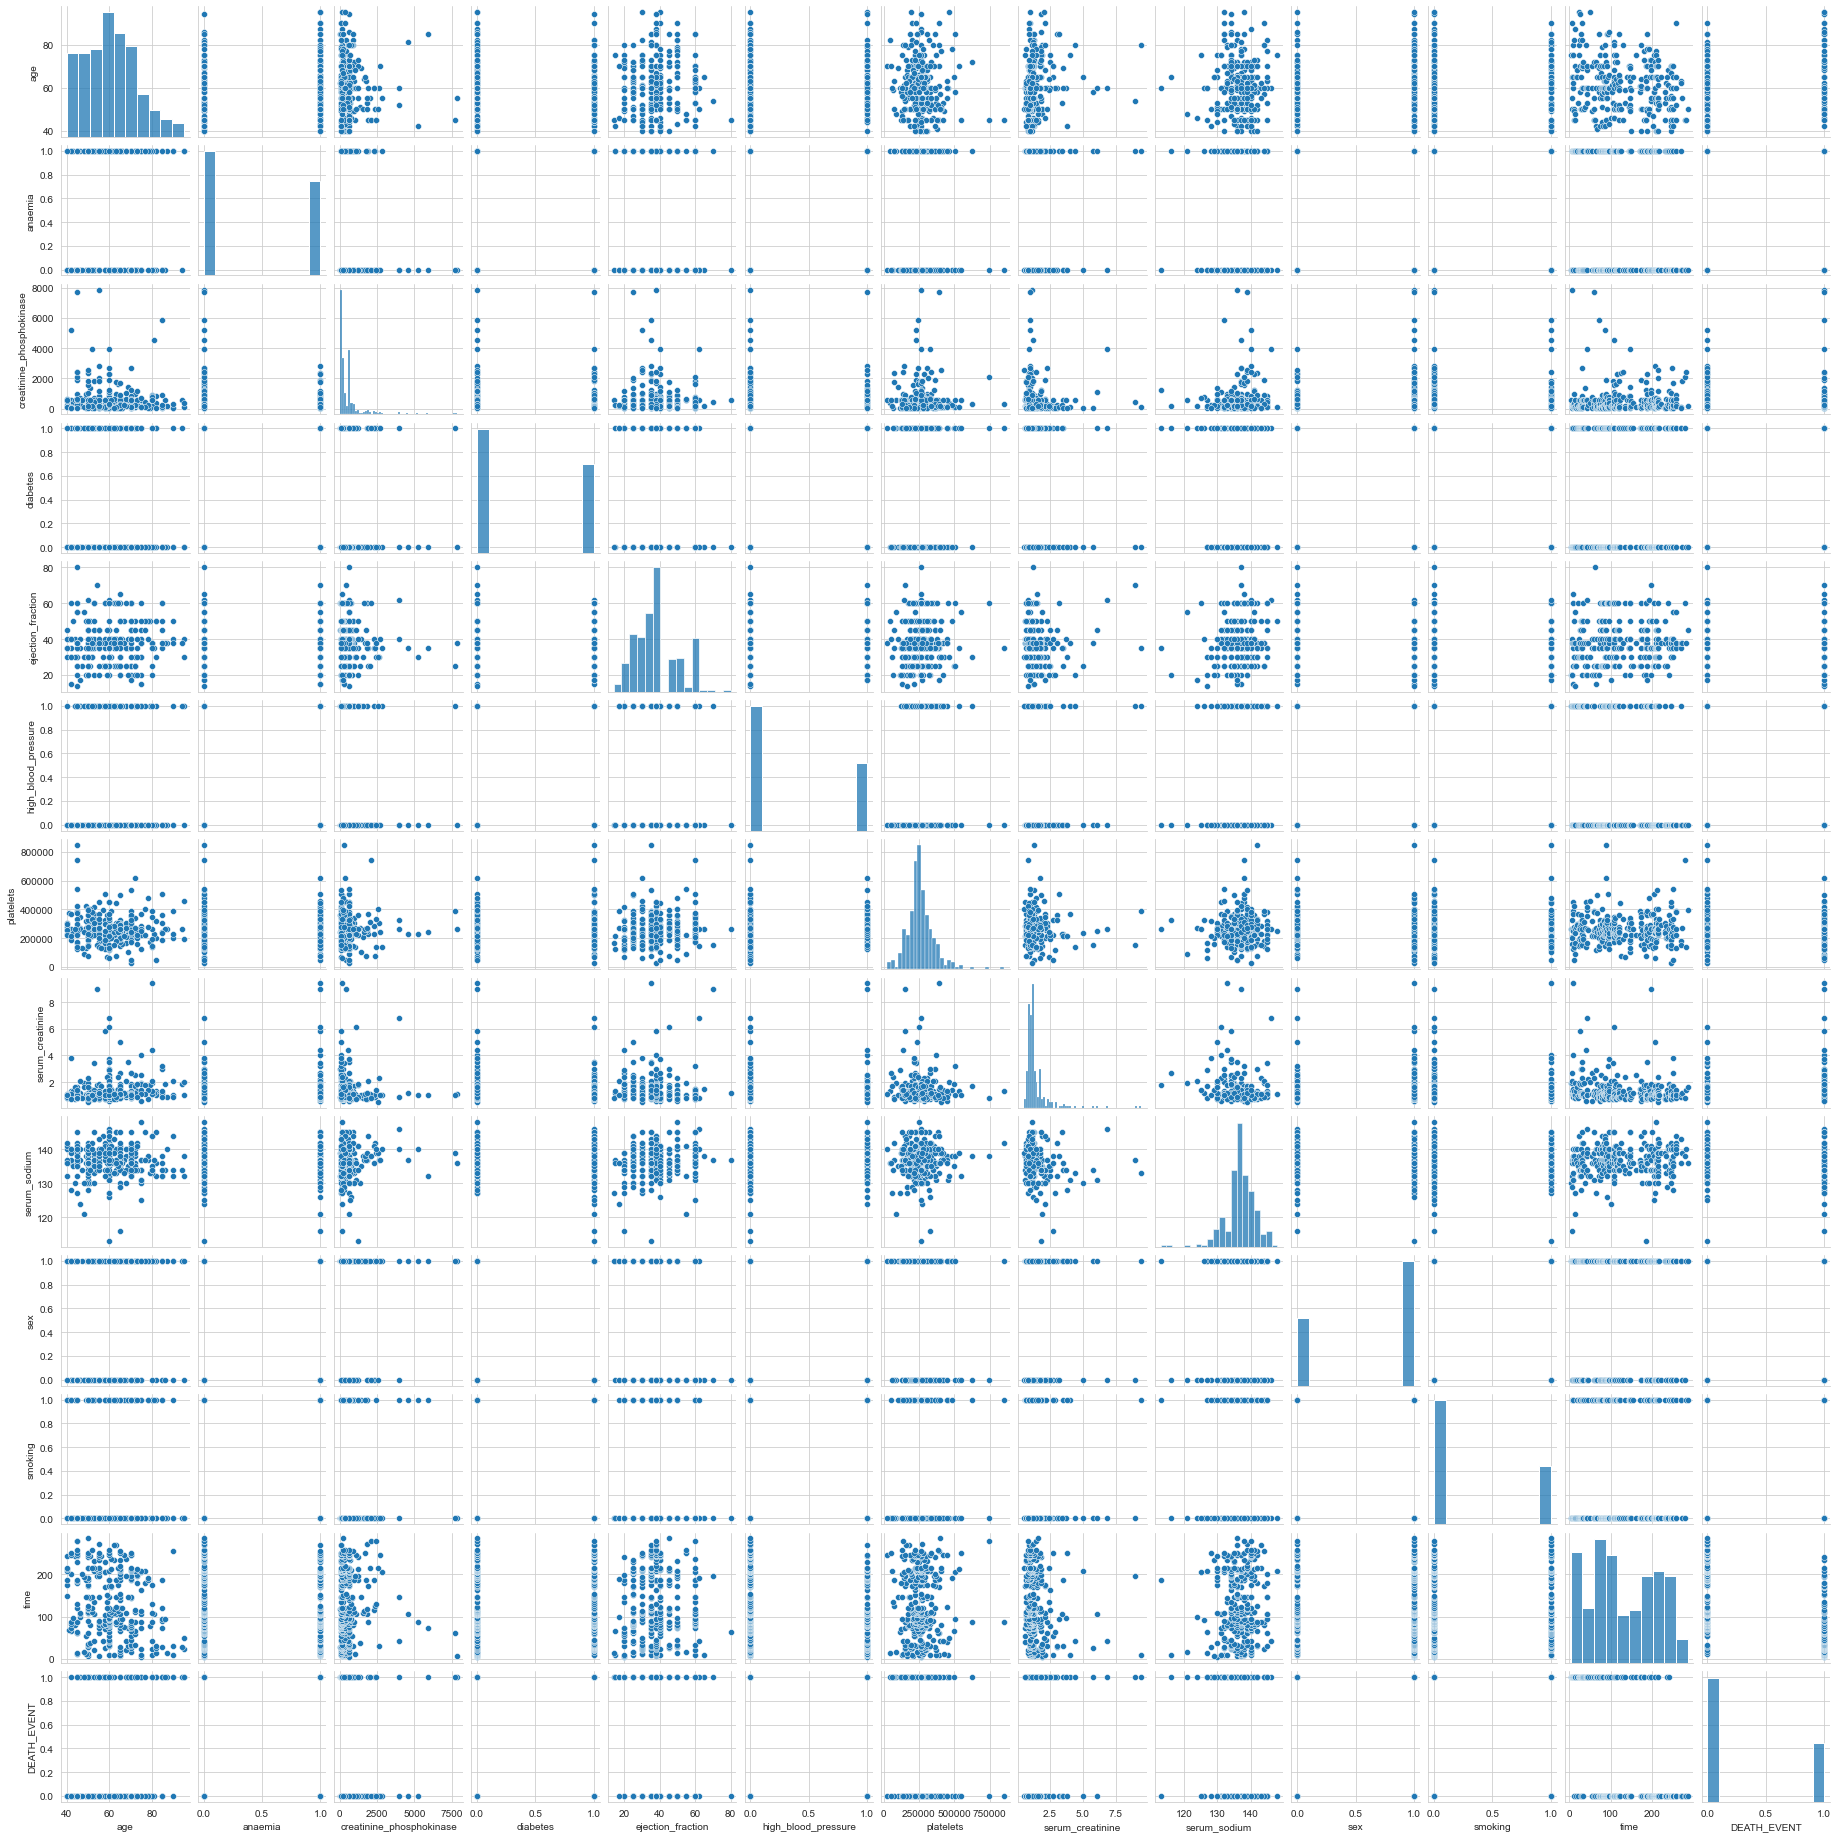

In [32]:
cols = heart_data.columns.tolist()
sns.pairplot(heart_data[cols], height=2.0)

### Exploration of Covariance  

Our covariance matrix below reports a number from -1, meaning strong negative correlation, to 1, strong correlation, with 0 meaning no correlation.  

Looking at the Death Event row, we see the strongest correlation between Time and Death Event. We see notable correlation (above 0.05) between Death Event and: Serum Creatinine, Ejection Fraction, Serum Sodium, High Blood Pressure, and Creatine Phosphokinase. Age also seems to be a factor, but it's hard to tell if it contributes to heart disease or if it's just natural causes.


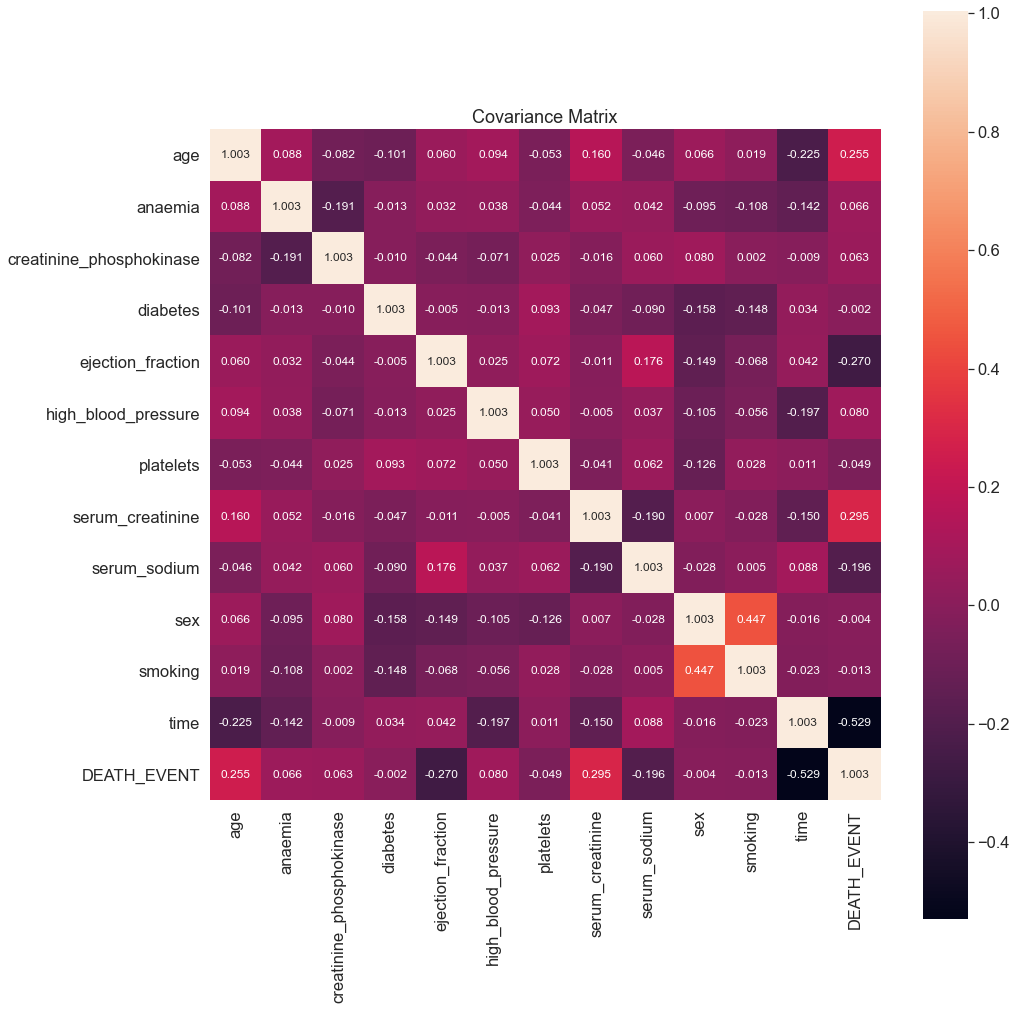

In [33]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_std = stdsc.fit_transform(heart_data[cols].iloc[:, range(0,13)].values)
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(15,15))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size':12}, yticklabels=cols, xticklabels=cols)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

### Distribution of Death Event by gender and age.  
Looking at the plot we see that the mean age of death for women is 60, while the mean age of death for men is 65. It seems that women tend to live longer overall.

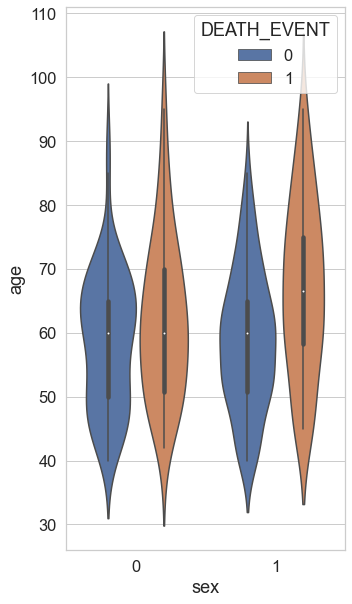

In [41]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
g = sns.violinplot(x='sex', y='age', hue='DEATH_EVENT', data=heart_data)

### Analysis of diabetes on death  
People who have diabetes tend to die at a younger age.

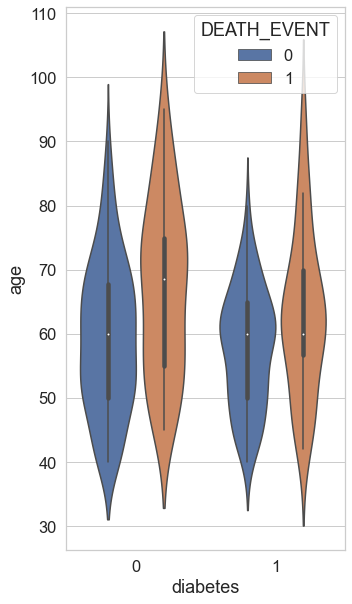

In [43]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
g = sns.violinplot(x='diabetes', y='age', hue='DEATH_EVENT', data=heart_data)

### Corellation between smoking and death event

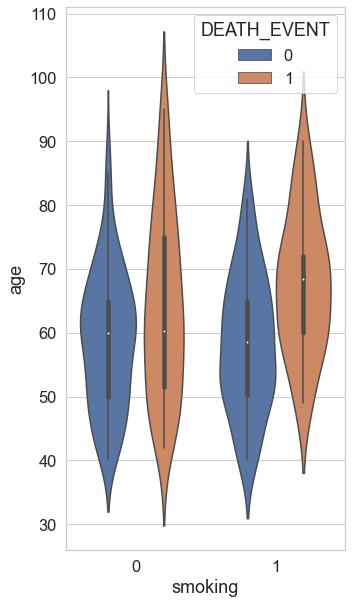

In [44]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
g = sns.violinplot(x='smoking', y='age', hue='DEATH_EVENT', data=heart_data)

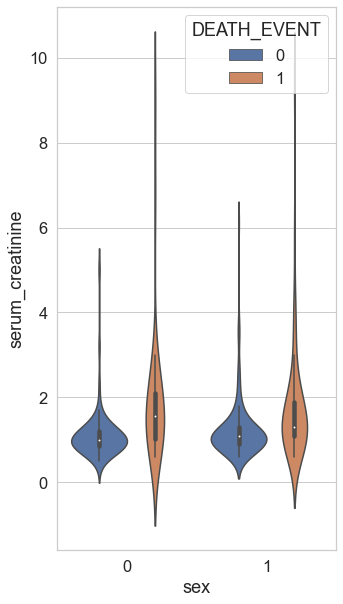

In [74]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
g = sns.violinplot(x='sex', y='serum_creatinine', hue='DEATH_EVENT', data=heart_data)

### What is “ejection fraction”?
Ejection fraction (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat.  

### What’s normal?
A normal heart’s ejection fraction may be between 50 and 70 percent.  
You can have a normal ejection fraction measurement and still have heart failure  
(called HFpEF or heart failure with preserved ejection fraction).  
  
If the heart muscle has become so thick and stiff that the ventricle holds a smaller than usual volume of blood, it might still seem to pump out a normal percentage of the blood that enters it. In reality, though, the total amount of blood pumped isn’t enough to meet your body’s needs.

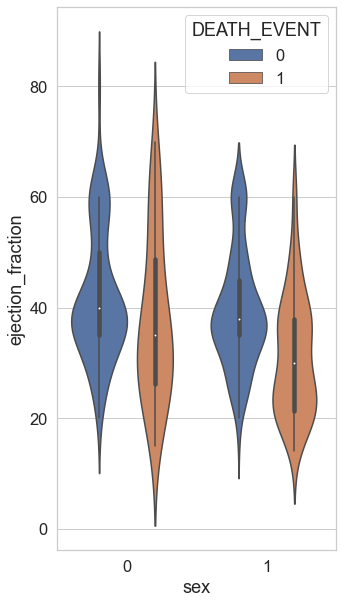

In [66]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
g = sns.violinplot(x='sex', y='ejection_fraction', hue='DEATH_EVENT', data=heart_data)

### Correlation between serum sodium levels and ejection fraction  
Because ejection fraction is so important we decided to test the correlation between serum sodium levels and ejection fraction.    
A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L). Hyponatremia occurs when the sodium in your blood falls below 135 mEq/L.

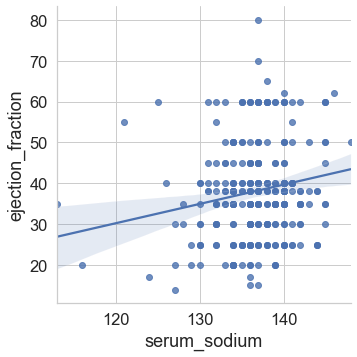

In [88]:
sns.lmplot(x='serum_sodium', y='ejection_fraction', data=heart_data);

In [82]:
np.cov(heart_data['ejection_fraction'], heart_data['serum_sodium'])

array([[140.06345537,   9.18578708],
       [  9.18578708,  19.46995578]])

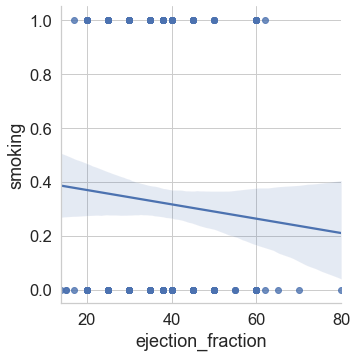

In [89]:
sns.lmplot(x='ejection_fraction', y='smoking', data=heart_data);

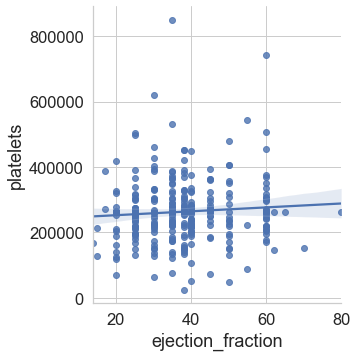

In [81]:
sns.lmplot(x='ejection_fraction', y='platelets', data=heart_data);

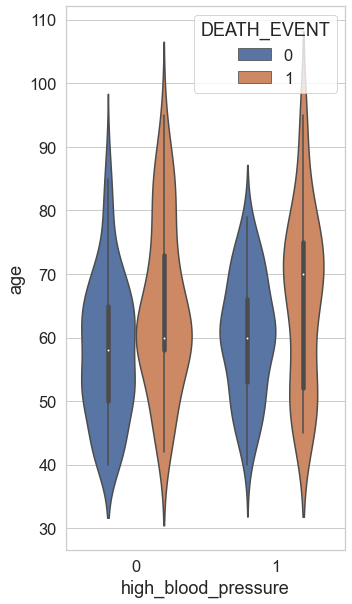

In [56]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
g = sns.violinplot(x='high_blood_pressure', y='age', hue='DEATH_EVENT', data=heart_data)

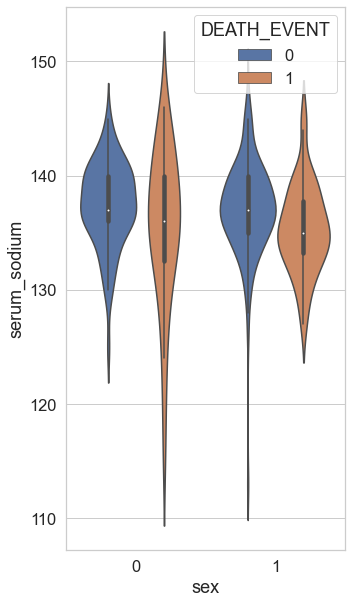

In [67]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
g = sns.violinplot(x='sex', y='serum_sodium', hue='DEATH_EVENT', data=heart_data)

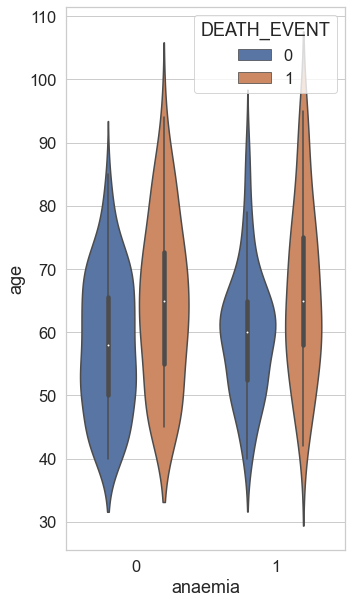

In [72]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
g = sns.violinplot(x='anaemia', y='age', hue='DEATH_EVENT', data=heart_data)

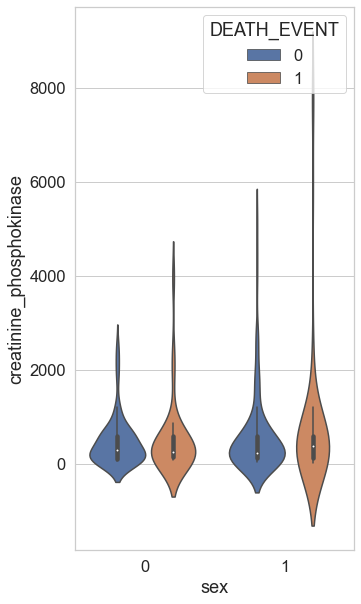

In [71]:
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
g = sns.violinplot(x='sex', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=heart_data)

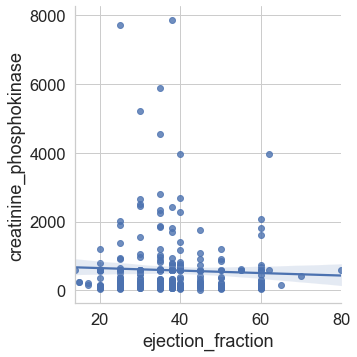

In [86]:
sns.lmplot(x='ejection_fraction', y='creatinine_phosphokinase', data=heart_data);